In [82]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

In [6]:
vgg19 = models.vgg19(pretrained=True)
for key, val in vgg19.state_dict().items():
    print(f"Key: {key} Value: {val.shape}")

Key: features.0.weight Value: torch.Size([64, 3, 3, 3])
Key: features.0.bias Value: torch.Size([64])
Key: features.2.weight Value: torch.Size([64, 64, 3, 3])
Key: features.2.bias Value: torch.Size([64])
Key: features.5.weight Value: torch.Size([128, 64, 3, 3])
Key: features.5.bias Value: torch.Size([128])
Key: features.7.weight Value: torch.Size([128, 128, 3, 3])
Key: features.7.bias Value: torch.Size([128])
Key: features.10.weight Value: torch.Size([256, 128, 3, 3])
Key: features.10.bias Value: torch.Size([256])
Key: features.12.weight Value: torch.Size([256, 256, 3, 3])
Key: features.12.bias Value: torch.Size([256])
Key: features.14.weight Value: torch.Size([256, 256, 3, 3])
Key: features.14.bias Value: torch.Size([256])
Key: features.16.weight Value: torch.Size([256, 256, 3, 3])
Key: features.16.bias Value: torch.Size([256])
Key: features.19.weight Value: torch.Size([512, 256, 3, 3])
Key: features.19.bias Value: torch.Size([512])
Key: features.21.weight Value: torch.Size([512, 512, 

In [51]:
for name, param in vgg19.named_parameters():
    if param.requires_grad:
        print(f"name: {name}, param.data: {param.data.shape}")

name: features.0.weight, param.data: torch.Size([64, 3, 3, 3])
name: features.0.bias, param.data: torch.Size([64])
name: features.2.weight, param.data: torch.Size([64, 64, 3, 3])
name: features.2.bias, param.data: torch.Size([64])
name: features.5.weight, param.data: torch.Size([128, 64, 3, 3])
name: features.5.bias, param.data: torch.Size([128])
name: features.7.weight, param.data: torch.Size([128, 128, 3, 3])
name: features.7.bias, param.data: torch.Size([128])
name: features.10.weight, param.data: torch.Size([256, 128, 3, 3])
name: features.10.bias, param.data: torch.Size([256])
name: features.12.weight, param.data: torch.Size([256, 256, 3, 3])
name: features.12.bias, param.data: torch.Size([256])
name: features.14.weight, param.data: torch.Size([256, 256, 3, 3])
name: features.14.bias, param.data: torch.Size([256])
name: features.16.weight, param.data: torch.Size([256, 256, 3, 3])
name: features.16.bias, param.data: torch.Size([256])
name: features.19.weight, param.data: torch.Size

In [59]:
print(list(vgg19.children()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPo

In [161]:
def read_input(img_path, device='cuda:0'):
    trans = transforms.Compose([
        transforms.CenterCrop(256),
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(img_path)
    image = trans(image)
    return image.unsqueeze(0).to(device)

In [79]:
im = read_input("n02274259_6282.jpg") # float32, between 0 and 1

In [41]:
with torch.no_grad():
    output = vgg19(im)
    print(output)

tensor([[-9.8720e-01,  1.1565e-01,  2.8022e-01,  2.8607e+00, -1.1031e+00,
          7.5160e+00,  4.9665e+00, -4.0461e-01,  2.3457e+00,  3.9179e-01,
          1.5752e+00,  1.5915e+00,  2.2291e+00,  2.3794e+00,  1.6771e+00,
          1.2623e+00,  1.8357e+00,  1.4436e+00, -8.8267e-01,  1.7974e+00,
          1.0667e+00,  4.9505e+00,  2.9254e-01, -6.8406e-01,  5.9491e+00,
          1.6701e+00,  4.8875e+00,  2.3108e+00,  1.2434e-01,  4.3062e+00,
         -4.6088e-01, -1.7351e-01,  2.9828e+00,  5.0525e+00,  4.0458e+00,
          2.8253e+00,  5.3340e+00,  2.0782e+00,  5.3726e+00,  1.3685e+00,
          3.1475e+00,  4.7606e+00,  2.5889e+00,  4.7815e+00,  4.0740e+00,
          2.0082e+00,  2.7627e+00,  5.3925e+00, -2.2736e+00, -5.1816e-02,
          9.4349e-01,  2.1312e+00,  9.7546e-01, -8.1870e-01,  2.0700e+00,
         -1.5381e+00, -9.0404e-01, -1.6040e+00,  1.9949e+00,  1.0104e+00,
          2.6596e+00, -1.1682e+00,  1.3638e-01,  1.9474e+00,  1.6918e+00,
          2.7619e+00,  5.2713e+00,  4.

## Style Transfer Core

### Consulting with:
* [Towards Data Science](https://towardsdatascience.com/neural-networks-intuitions-2-dot-product-gram-matrix-and-neural-style-transfer-5d39653e7916)
* 

In [87]:
def write_output(output_path, output_image):
    print(f"output shape: {output_image.shape}")
    print(f"min: {torch.min(output_image)} max:{torch.max(output_image)}")
    image = transforms.ToPILImage()(output_image)
    image.save(output_path)

In [434]:
def content_loss(model, content, transfered):
    content_feature_layer = 19
    layers = list(model.children())
    assert(len(layers) > 0)
    conv_layers = layers[0]
    
    for param in model.features.parameters():
        param.requires_grad = False
    
    m_content = content.clone()
    for idx, layer in enumerate(conv_layers):
        m_content = layer(m_content)
        transfered = layer(transfered)
        if idx == content_feature_layer:
            loss = nn.MSELoss()
            return loss(m_content, transfered)

In [423]:
def gram_matrix(features):
#     print(f"feature shape: {features.shape}")
    b,c,w,h = features.shape
    assert b == 1
    # The features.clone() here took me a long time to find out that I need to add.
    # The reason isn't immediately clear to me why this is necessary.
    reshaped_features = torch.reshape(features.clone(), (c, -1))
#     print(f"reshaped feature shape: {reshaped_features.shape}")
    gram_ma = torch.mm(reshaped_features, reshaped_features.t())
#     print(f"gram matrix shape: {gram_ma.shape}")
    return gram_ma

In [424]:
def style_loss(model, style, transfered):
    conv_index = [1, 6, 11, 20, 29]
    style_feature_layers = set(conv_index)
    
    layers = list(model.children())
    assert(len(layers) > 0)
    conv_layers = layers[0]
    
    for param in model.features.parameters():
        param.requires_grad = False

    criterion = nn.MSELoss()
    losses = []
    m_style = style
    m_transfered = transfered
    for idx, layer in enumerate(conv_layers):
        m_style = layer(m_style)
        m_transfered = layer(m_transfered)
        
        if idx in style_feature_layers:
            loss = criterion(gram_matrix(m_style), gram_matrix(m_transfered))
            losses.append(loss)
            if idx == max(style_feature_layers):
                return sum(losses) * 0.2

In [442]:
def plot_loss(losses, max_iter, max_loss):
    plt.figure(figsize=(5,5))
    plt.plot(range(max_iter)[:len(losses)], losses, "*-")
    plt.yticks(np.arange(0, max_loss, step=2))
    plt.xticks(np.arange(0, max_iter, step=100))
    plt.title("Accuracy vs Epsilon")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

In [441]:
def neural_style_transfer(model, content_image, style_image, transfered_image, num_steps=100, device='cuda:0'):
    model = model.to(device)
    run_index = 0
    optimizer = torch.optim.LBFGS([transfered_image.requires_grad_(True)])
    losses = []
    
    while run_index < num_steps:
        def closure():
            optimizer.zero_grad()
            content_l = content_loss(model, content_image, transfered_image)
            style_l = style_loss(model, style_image, transfered_image)
            loss = 1000 * content_l  + 0.1 * style_l
            loss.backward()
            return loss

        run_index += 1
        loss_val = optimizer.step(closure)
        losses.append(torch.log(loss_val))
        if run_index % 10 == 0:
            plot_loss(losses, num_steps, 10)
        
    return transfered_image

### Inference

In [368]:
content_path = "n02274259_6282.jpg"
style_path = "studio-ghibli-theme-park-1280x720.jpg"
output_folder = "output"

In [397]:
def read_input_for_view(img_path):
    trans = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(), 
    ])
    image = Image.open(img_path)
    image = trans(image)
    return image.numpy()

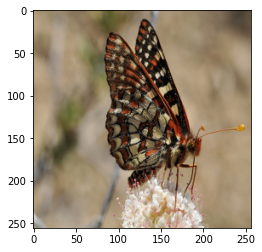

In [398]:
content_image = read_input_for_view(content_path)
plt.imshow(content_image.transpose(1,2,0))

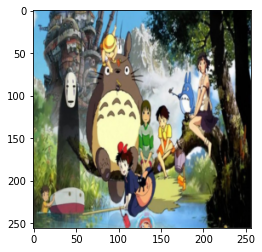

In [399]:
style_image = read_input_for_view(style_path)
plt.imshow(style_image.transpose(1,2,0))

reading content: torch.Size([1, 3, 256, 256]), style: torch.Size([1, 3, 256, 256])


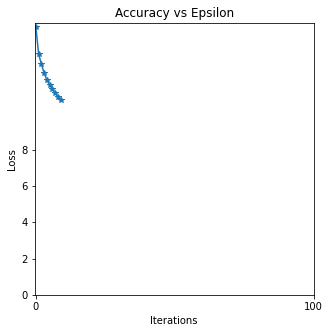

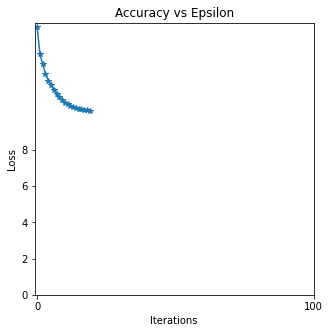

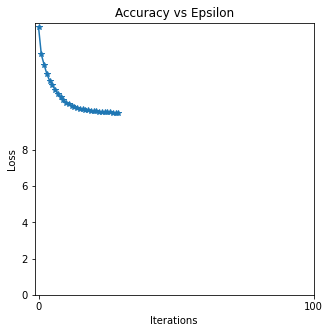

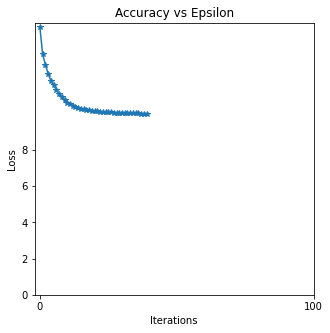

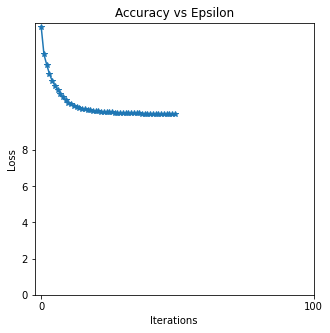

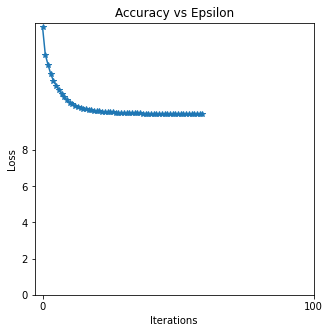

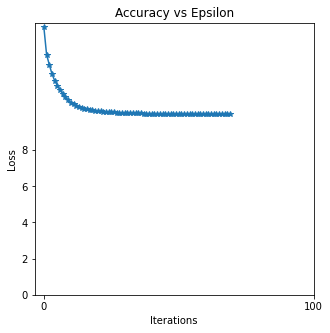

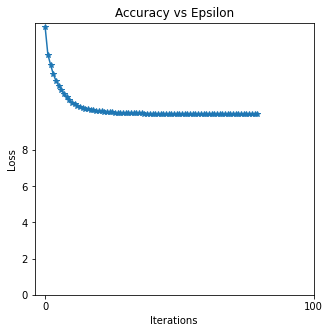

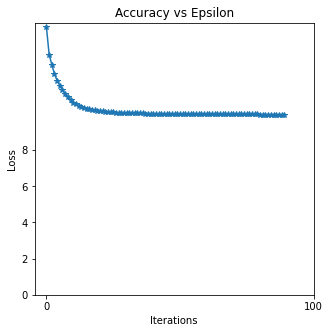

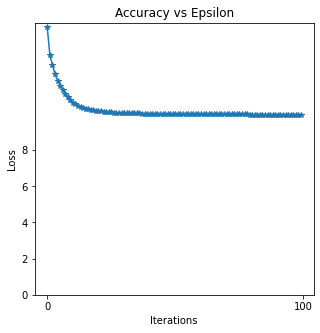

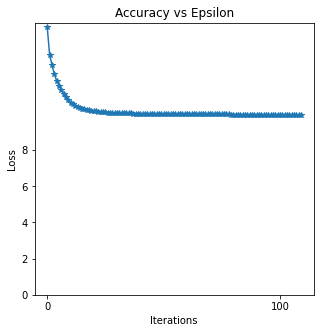

In [ ]:
torch.autograd.set_detect_anomaly(True)

device = 'cuda:1'
vgg19 = vgg19.to(device)
content_image = read_input(content_path, device)
style_image = read_input(style_path, device)
print(f"reading content: {content_image.shape}, style: {style_image.shape}")
# transfered_image = torch.randn(content_image.shape, dtype=content_image.dtype).to(device)
transfered_image = content_image.clone()

output_img = neural_style_transfer(vgg19, content_image, style_image, transfered_image, 200, device)
output_img = output_img.cpu().detach()

# output_file_path = os.path.splitext(os.path.basename(content_path))[0]+"_output_1.png"
# write_output(os.path.join(output_folder, output_file_path), output_img[0])

In [ ]:
output_file_path = os.path.splitext(os.path.basename(content_path))[0]+"_output_1.png"
write_output(os.path.join(output_folder, output_file_path), output_img[0])

In [330]:
style_image.min()

tensor(-2.1179, device='cuda:1')

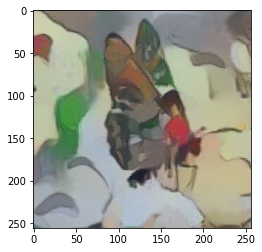

In [446]:
tmp = transfered_image.cpu().detach()[0]
tmp = transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1/0.229, 1/0.224, 1/0.225])(tmp)
tmp = tmp.numpy().transpose(1,2,0)
tmp = tmp - tmp.min()
tmp = tmp / tmp.max()
plt.imshow(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


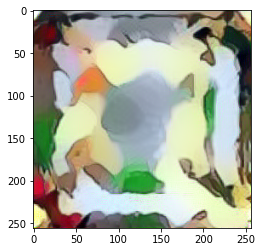

In [335]:
tmp = output_img[0].numpy().transpose(1,2,0)
tmp = tmp - style_image.min().item()
tmp = tmp / (style_image.max() - style_image.min()).item()
plt.imshow(tmp)

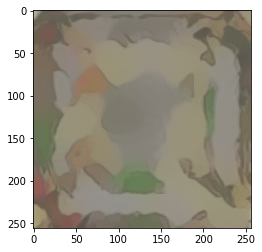

In [337]:
tmp = output_img[0].numpy().transpose(1,2,0)
tmp *= [0.229, 0.224, 0.225]
tmp += [0.485, 0.456, 0.406]
plt.imshow(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


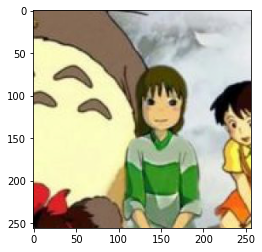

In [342]:
tmp = style_image[0].cpu().numpy().transpose(1,2,0)
tmp *= [0.229, 0.224, 0.225]
tmp += [0.485, 0.456, 0.406]
plt.imshow(tmp)

In [340]:
tmp.max()

0.8137979

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


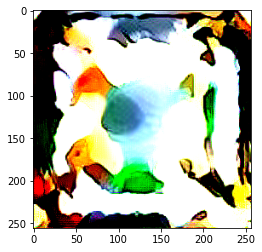

In [325]:
plt.imshow((output_img[0].numpy().transpose(1, 2, 0)))
plt.show()